In [ ]:
pip install ucimlrepo

In [ ]:
pip install xgboost

In [ ]:
!pip install missingno

In [4]:
# Data Handling & Preprocessing
import numpy as np
import pandas as pd
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # optional for interactive

#Preprocessing & Feature Engineering
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


#Model Selection & Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Utilities
import os
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

import missingno


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features # independent variables
y = adult.data.targets  # dependent variables
  
# # metadata 
# # print(adult.metadata) 
  
# # variable information 
# adult.variables

In [6]:
# metadata 
adult.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

In [7]:
# variable information 
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [8]:
df = pd.concat([X, y], axis=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [9]:
df.shape

(48842, 15)

df.info()

Analysis :
<br>There are 48842 rows and 15  in our dataset.
<br>There are 6 coulmns are numerical and 9 have  object datatypes.
<br> There are NAN values in 3 columsns which are object datatypes.

#### Handling Missing Values

In [10]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

#### Replacing Nan values 

In [11]:
# Replacing Nan with mode value on null value in df['workclass']
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

#replace null values as missing
df.fillna( {'occupation' :'Missing'}, inplace = True)

#replace null values as anyCountry
df['native-country'] = df['native-country'].fillna('anyCountry')

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
(df == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [13]:
df.replace('?', pd.NA, inplace=True)
(df == '?').any().any()

False

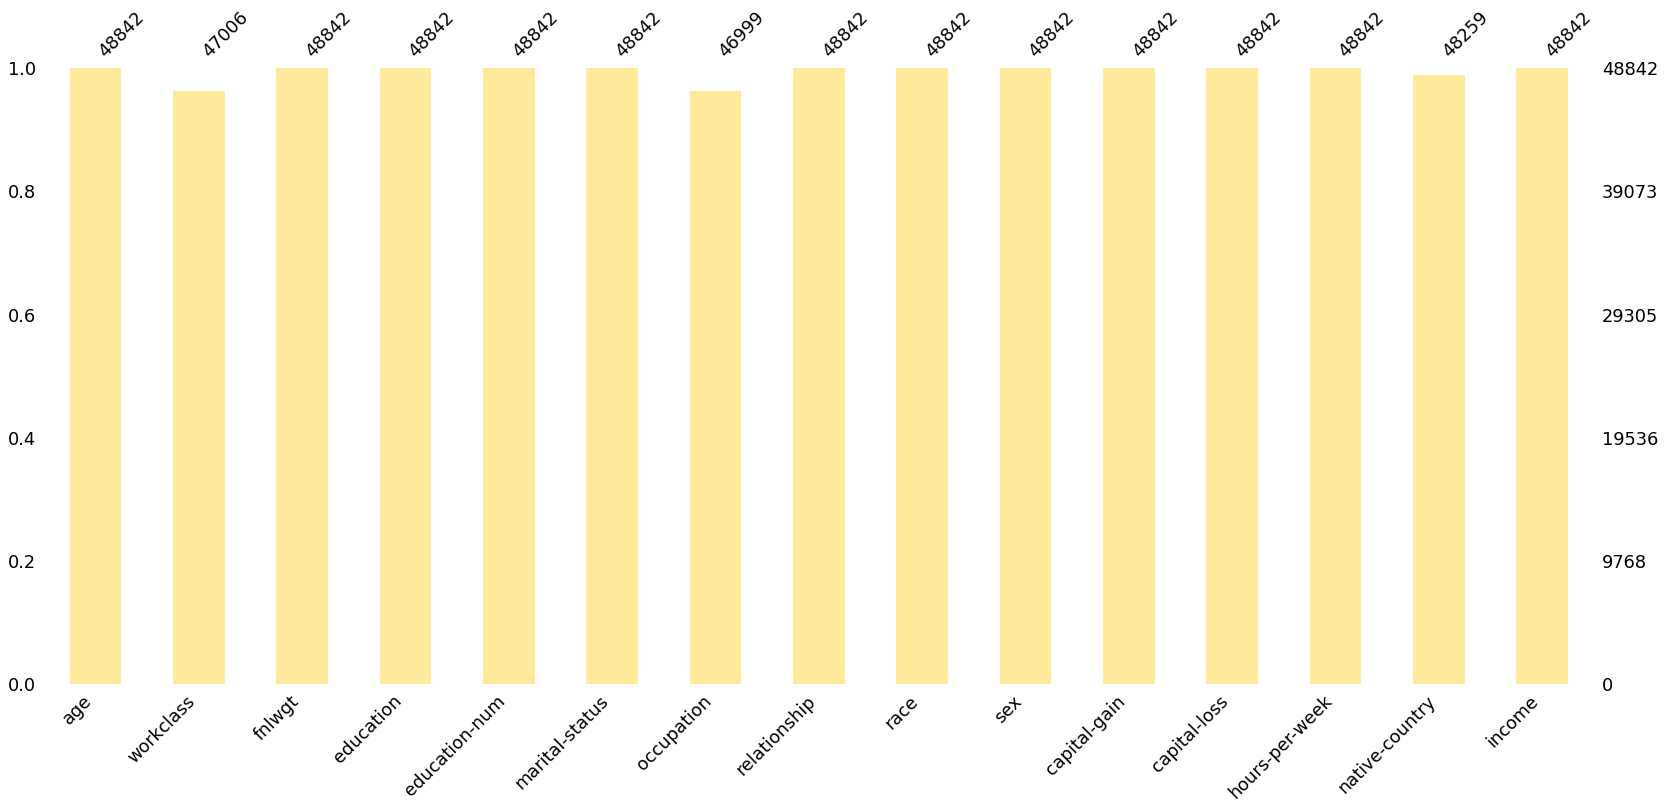

In [14]:
plt.figure(figsize=(8, 4),dpi=80)  # Width=8, Height=4 (adjust as needed)
missingno.bar(df, color='#FFE99A')
plt.show()

#### Unique value

In [15]:
df.nunique()

age                  74
workclass             8
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [16]:
#  OR 
unique_value =[]
for i in df.columns : 
    x= df[i].nunique()
    unique_value.append(x)
pd.DataFrame(unique_value,index = df.columns,columns=['Total unique Values']) #.transpose()

,Total unique Values
age,74
workclass,8
fnlwgt,28523
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [17]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [18]:
 categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [19]:
for col in categorical_cols:
    unique_vals = df[col].unique()
pd.DataFrame(unique_vals )

,0
0,<=50K
1,>50K
2,<=50K.
3,>50K.


In [20]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [21]:
df['income'] = df['income'].str.replace('.', '', regex=False).str.strip()
print(df['income'].unique())

['<=50K' '>50K']


In [22]:
df.value_counts().count()

46396

In [23]:
lst =[]
for col in categorical_cols:
    unique_vals = df[col].value_counts().count()
    lst.append(unique_vals)
pd.DataFrame(lst ,index =categorical_cols,columns =['Total unique Values'] )


,Total unique Values
workclass,8
education,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2
native-country,42
income,2


calculating unique values  we can understand wheather data is numerical or categorical

#### Prparation for EDA

#### Examine stastics of the variables

In [24]:
df[numeric_cols].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Hypothesis 

In [25]:
from scipy.stats import ttest_ind

t_test_results = []

for col in numeric_cols:
    low_income = df[df['income'] == '<=50K'][col].dropna()
    high_income = df[df['income'] == '>50K'][col].dropna()
    
    if len(low_income ) > 0 and len(high_income) > 0:
        t_stat, p_val = ttest_ind(low_income , high_income, equal_var=False)
        t_test_results.append({'Feature': col, 'T-Statistic': t_stat, 'P-Value': p_val})
    else:
        t_test_results.append({'Feature': col, 'T-Statistic': None, 'P-Value': None})

t_test_df = pd.DataFrame(t_test_results)
print("T-Test Results:")
t_test_df


T-Test Results:


,Feature,T-Statistic,P-Value
0,age,-60.660317,0.000000e+00
1,fnlwgt,1.430096,1.527048e-01
2,education-num,-78.878453,0.000000e+00
3,capital-gain,-28.517939,5.257854e-173
4,capital-loss,-24.353912,2.648759e-128
5,hours-per-week,-54.662247,0.000000e+00


In [26]:
from scipy.stats import chi2_contingency

chi2_results = []

for col in categorical_cols:
    if col == 'income':
        continue  # Skip target

    contingency = pd.crosstab(df[col], df['income'])

    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p_val, dof, expected = chi2_contingency(contingency)
        chi2_results.append({'Feature': col, 'Chi2 Statistic': chi2, 'P-Value': p_val})
    else:
        chi2_results.append({'Feature': col, 'Chi2 Statistic': None, 'P-Value': None})

chi2_df = pd.DataFrame(chi2_results)
print("\nChi-Square Test Results:")
chi2_df



Chi-Square Test Results:


,Feature,Chi2 Statistic,P-Value
0,workclass,1299.819456,1.819780e-276
1,education,6537.972961,0.000000e+00
2,marital-status,9816.015037,0.000000e+00
3,occupation,5706.045688,0.000000e+00
4,relationship,10088.722490,0.000000e+00
5,race,487.026287,4.284378e-104
6,sex,2248.847679,0.000000e+00
7,native-country,452.395941,9.595333e-71


#### EDA

In [27]:
#### Univariate Analysis for numerical variables

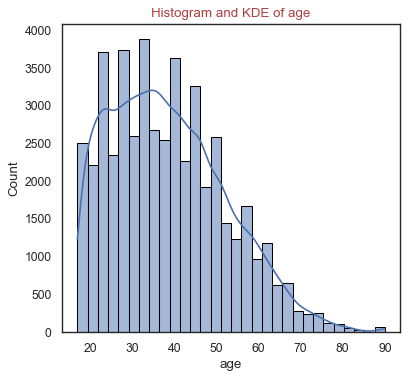

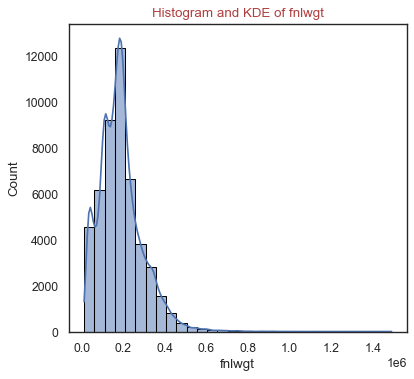

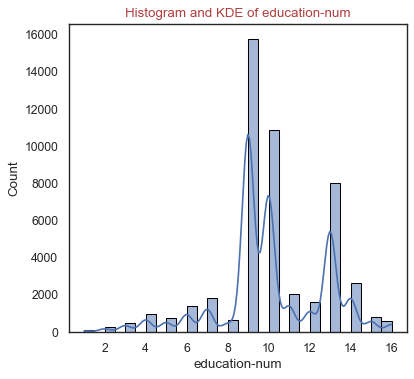

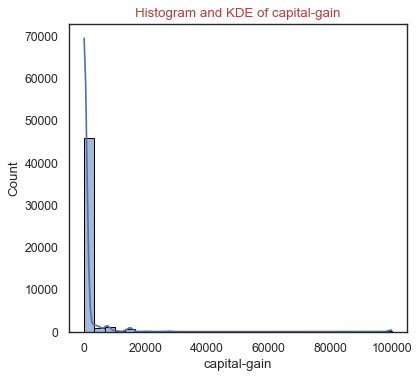

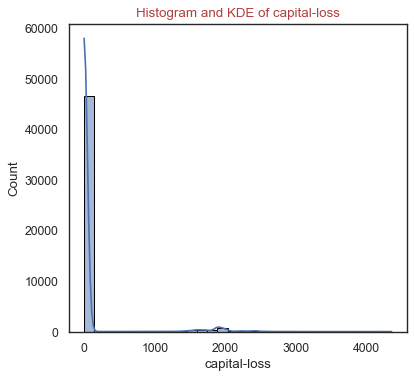

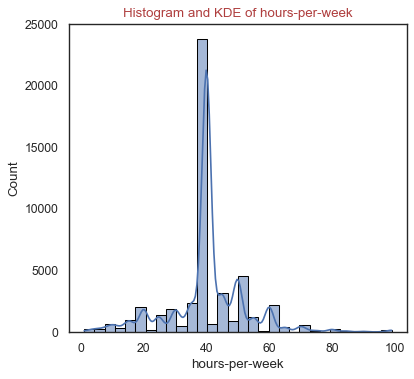

In [28]:
# Set up plotting style
sns.set(style="white")

# Univariate analysis for numerical columns using histogram
for col in numeric_cols:
    plt.figure(figsize=(12,5),dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, bins=30,edgecolor='black')
    plt.title(f'Histogram and KDE of {col}',color= '#AF3E3E')

In [29]:
print(df.skew(numeric_only=True))

age                0.557580
fnlwgt             1.438892
education-num     -0.316525
capital-gain      11.894659
capital-loss       4.569809
hours-per-week     0.238750
dtype: float64


#### EDA

In [30]:
#### Univariate Analysis for categorical variables

In [31]:
df[categorical_cols].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47006,48842,48842,46999,48842,48842,48842,48259,48842
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,34869,15784,22379,6172,19716,41762,32650,43832,37155


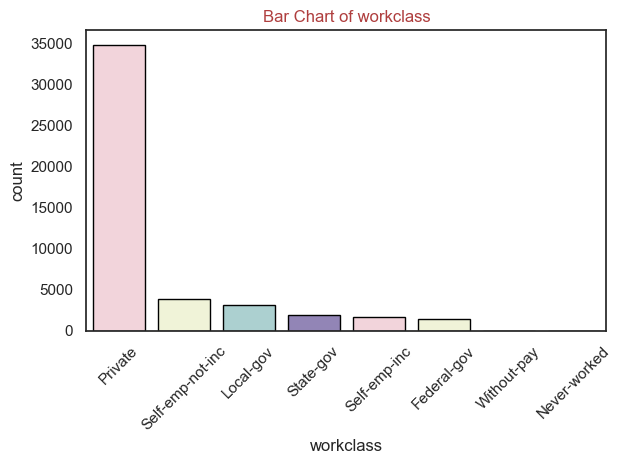

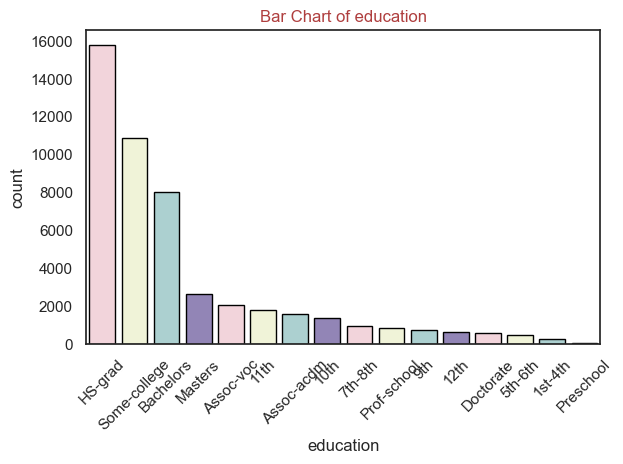

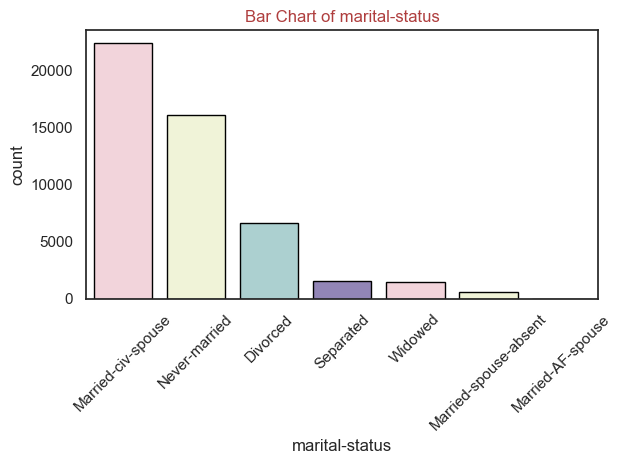

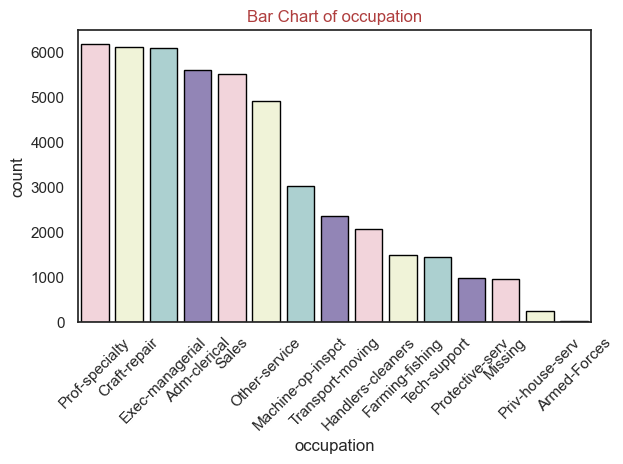

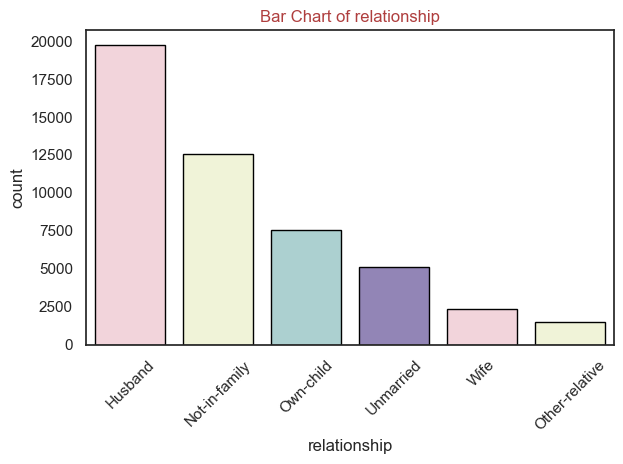

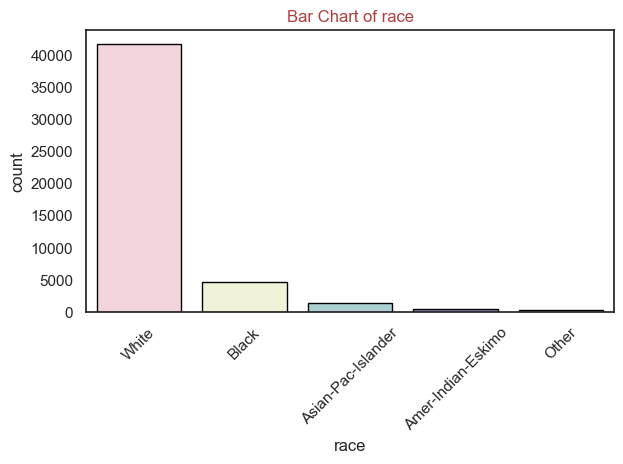

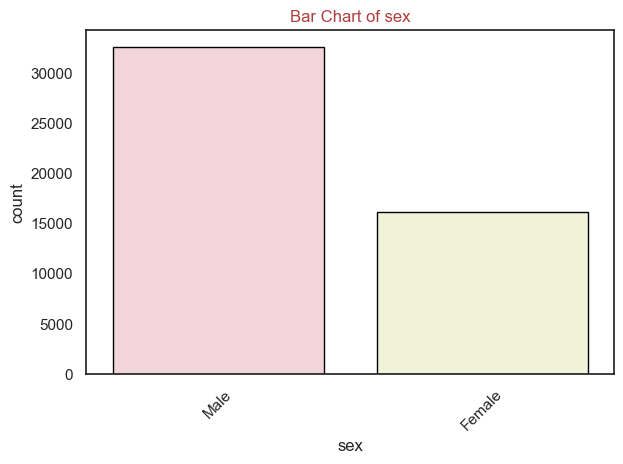

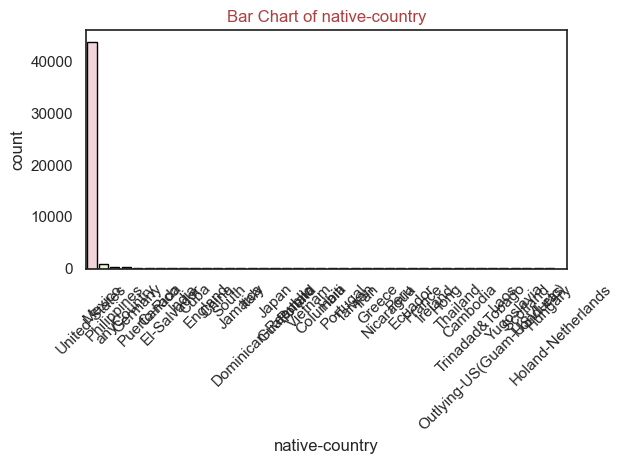

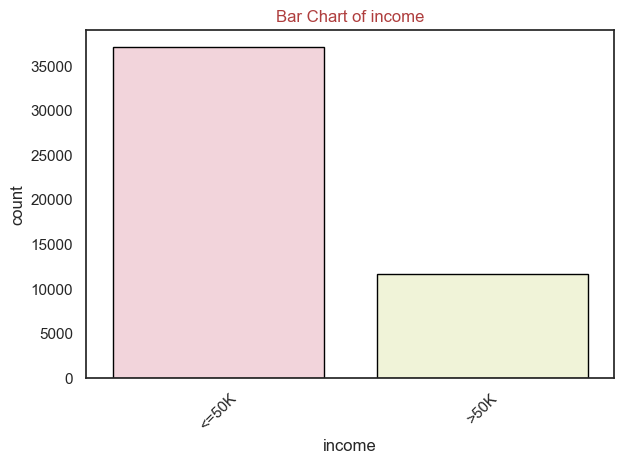

In [32]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

custom_colors = [
    (247/255, 207/255, 216/255),
    (244/255, 248/255, 211/255),
    (166/255, 214/255, 214/255),
    (142/255, 125/255, 190/255)
]

for col in categorical_cols:
    order = df[col].value_counts().index  # Sort categories by frequency
    
    # Get as many colors as needed
    num_categories = df[col].nunique()
    bar_colors = list(itertools.islice(itertools.cycle(custom_colors), num_categories))

    sns.countplot(x=col, data=df, order=order, palette=bar_colors,edgecolor='black')
    plt.title(f'Bar Chart of {col}', color='#AF3E3E')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [33]:
#### Bivaraiate Analysis - To idenifey gap that we saw between bars e.g education_num and ups and downs in bar e.g age above in  univaraite analysis

In [34]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [35]:
numeric_cols.append('income')
numeric_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

In [36]:
numeric_axis = numeric_cols
numeric_axis

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

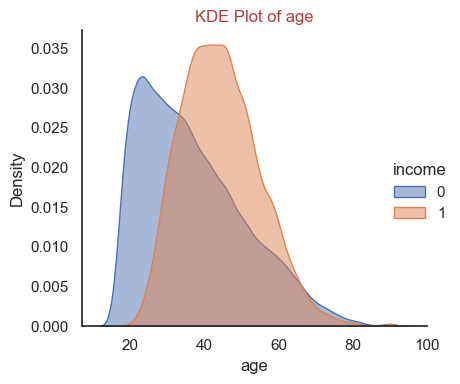

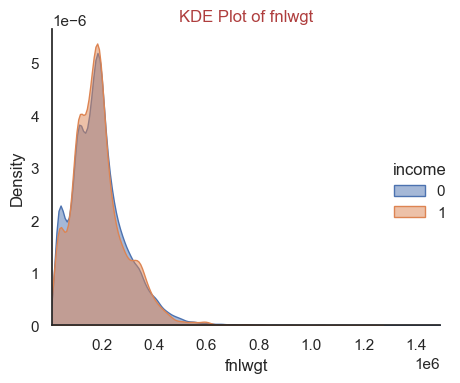

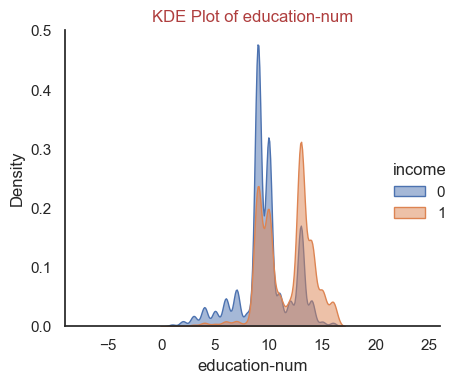

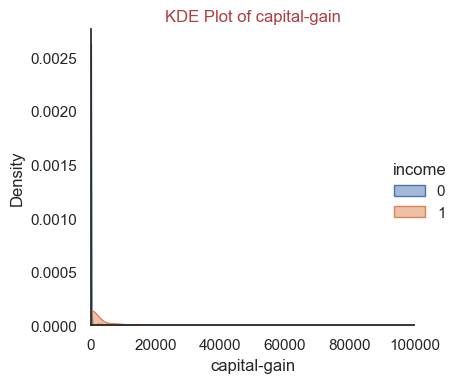

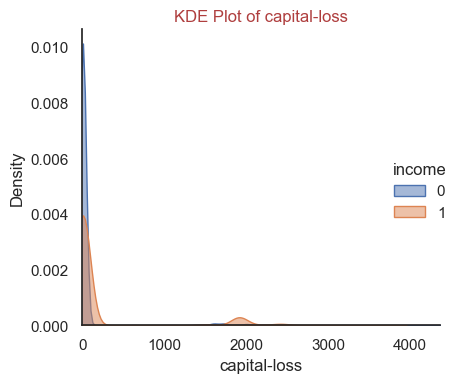

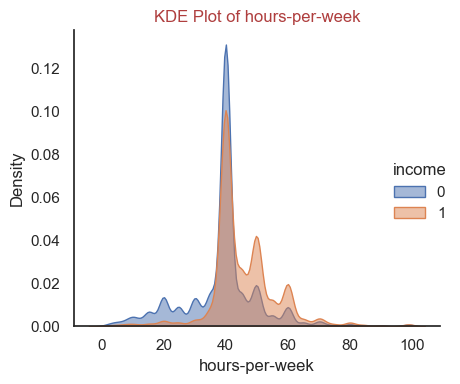

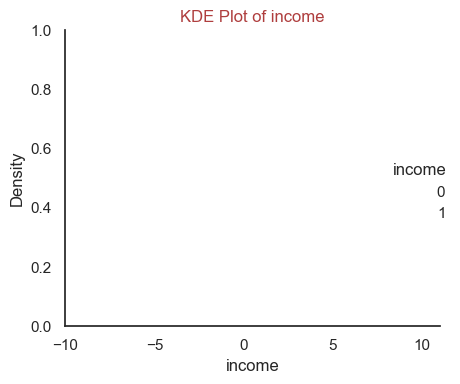

In [37]:
for i,z in list(zip(numeric_cols ,numeric_axis )):
    graph = sns.FacetGrid(df, hue='income', height=4)
    graph.map(sns.kdeplot, i, fill=True, common_norm=False, alpha=0.5)
    graph.add_legend()
    
    plt.xlim(df[i].min() - 10, df[i].max() + 10)
    plt.title(f'KDE Plot of {i}', color='#AF3E3E')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

In [38]:
df[numeric_cols].corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


In [39]:
df[numeric_cols].corr().iloc[:,[-1]]

,income
age,0.230369
fnlwgt,-0.006339
education-num,0.332613
capital-gain,0.223013
capital-loss,0.147554
hours-per-week,0.227687
income,1.000000


In [40]:
# # Encode categorical columns numerically first
# # We want to compute correlation between categorical columns (e.g., to see if some are redundant), 
# # so used label encoding or one-hot encoding:
df_category_encoded = df[categorical_cols].apply(lambda x: x.astype('category').cat.codes)
df_category_encoded


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,6,9,4,0,1,4,1,38,0
1,5,9,2,3,0,4,1,38,0
2,3,11,0,5,1,4,1,38,0
3,3,1,2,5,0,2,1,38,0
4,3,9,2,10,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...
48837,3,9,0,10,1,4,0,38,0
48838,3,11,6,7,2,2,1,38,0
48839,3,9,2,10,0,4,1,38,0
48840,3,9,0,0,3,1,1,38,0


In [42]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', <NA>, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [43]:
categorical_axis = df_category_encoded
categorical_axis.nunique()

workclass          9
education         16
marital-status     7
occupation        16
relationship       6
race               5
sex                2
native-country    43
income             2
dtype: int64

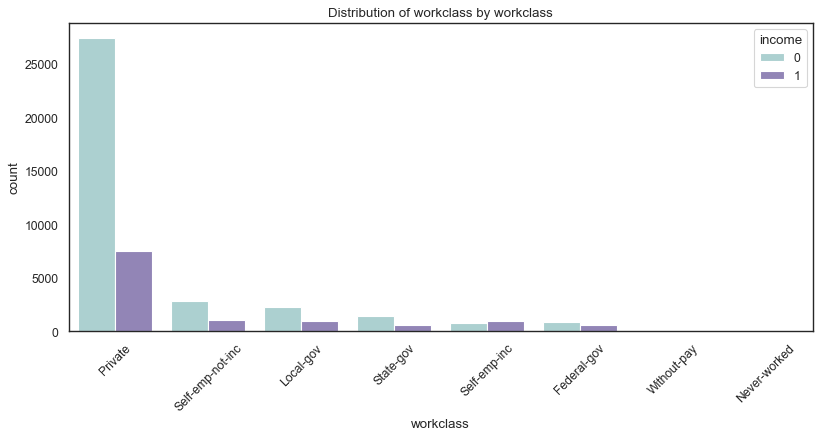

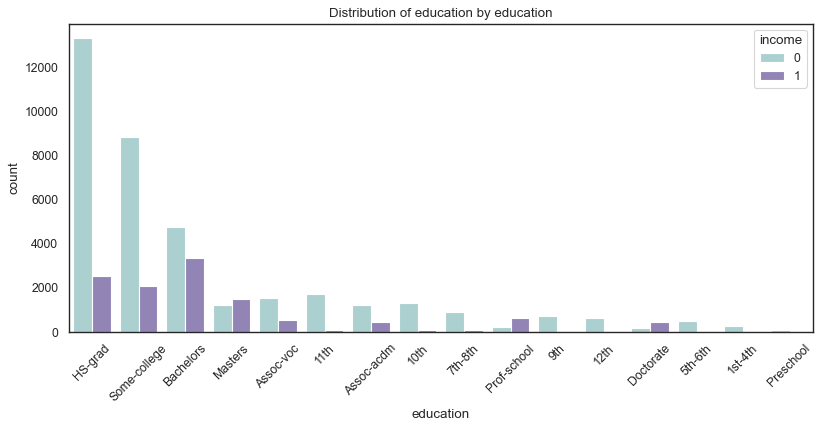

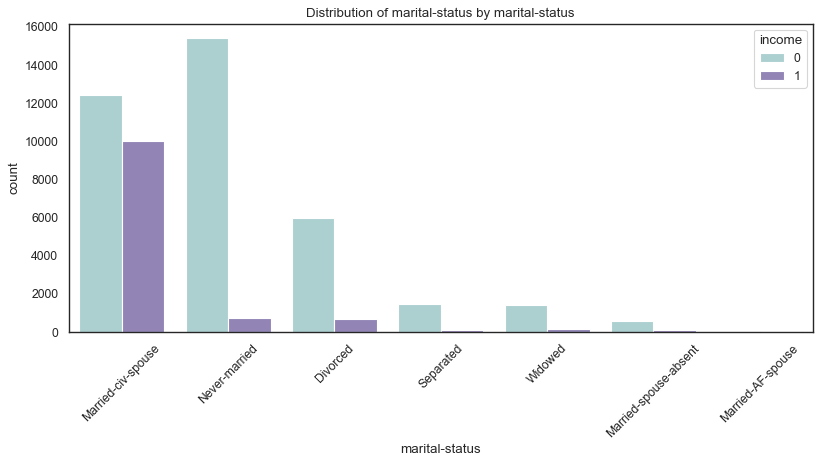

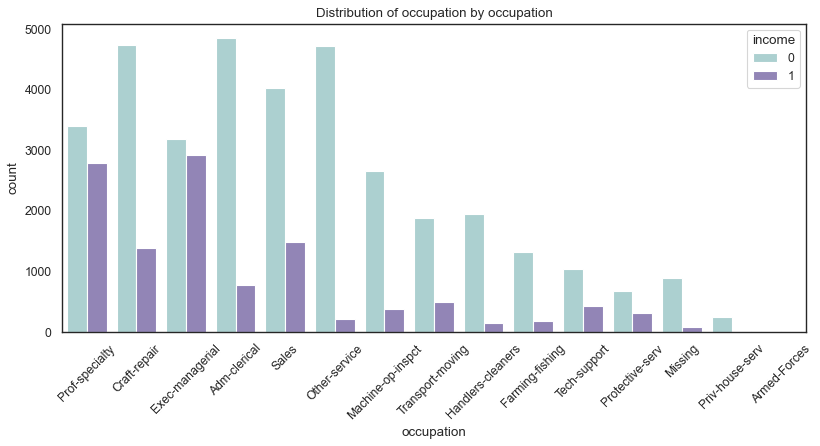

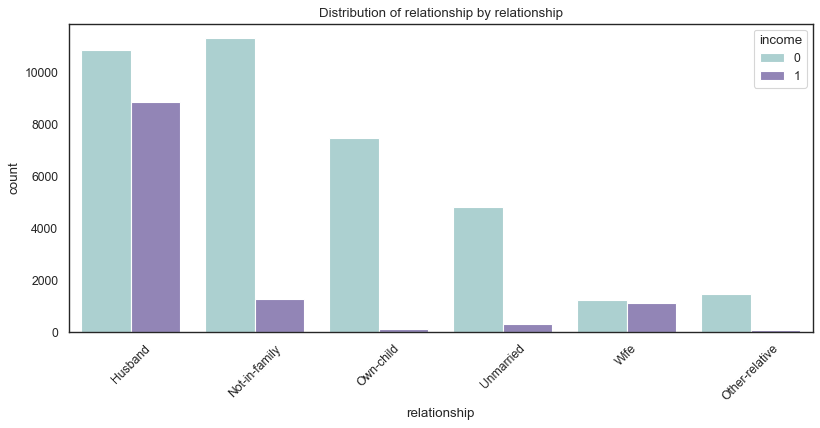

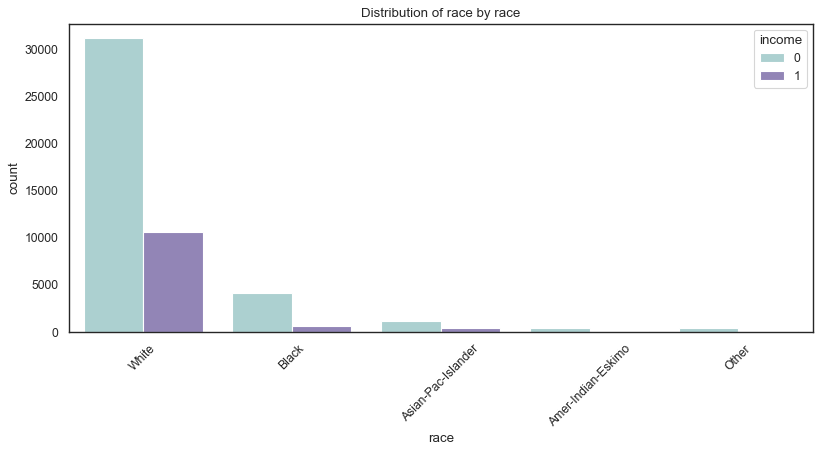

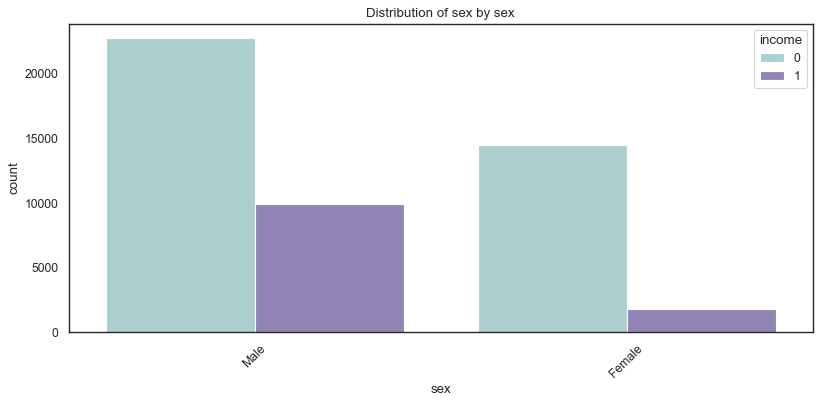

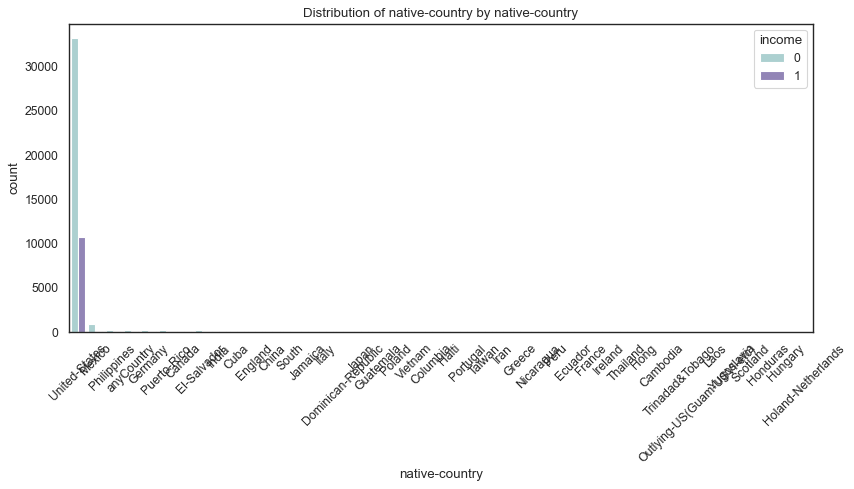

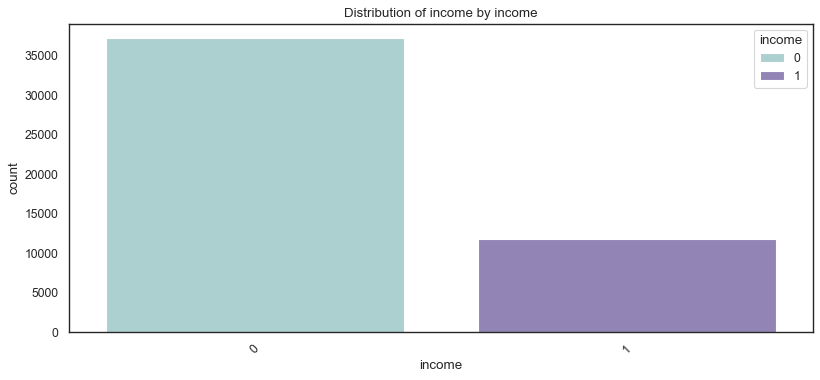

In [44]:
custom_palette = {
    0: '#A6D6D6',  # Light greenish
    1: '#8E7DBE'    # Purple
}
for i,z in list(zip(df_category_encoded,categorical_axis )):
    plt.figure(figsize=(12,5),dpi=80)
    asc = df[i].value_counts().sort_values(ascending=False).index
    sns.countplot(x=i, data=df,order=asc,hue='income',palette=custom_palette )
    plt.title(f'Distribution of {i} by {z}')
    plt.xticks(rotation=45)
    plt.show()

In [45]:
df_category_encoded.corr().iloc[:,[-1]]

,income
workclass,0.034697
education,0.080091
marital-status,-0.199072
occupation,0.063153
relationship,-0.253214
race,0.070934
sex,0.214628
native-country,0.015379
income,1.000000


#### Multivariate Analysis 

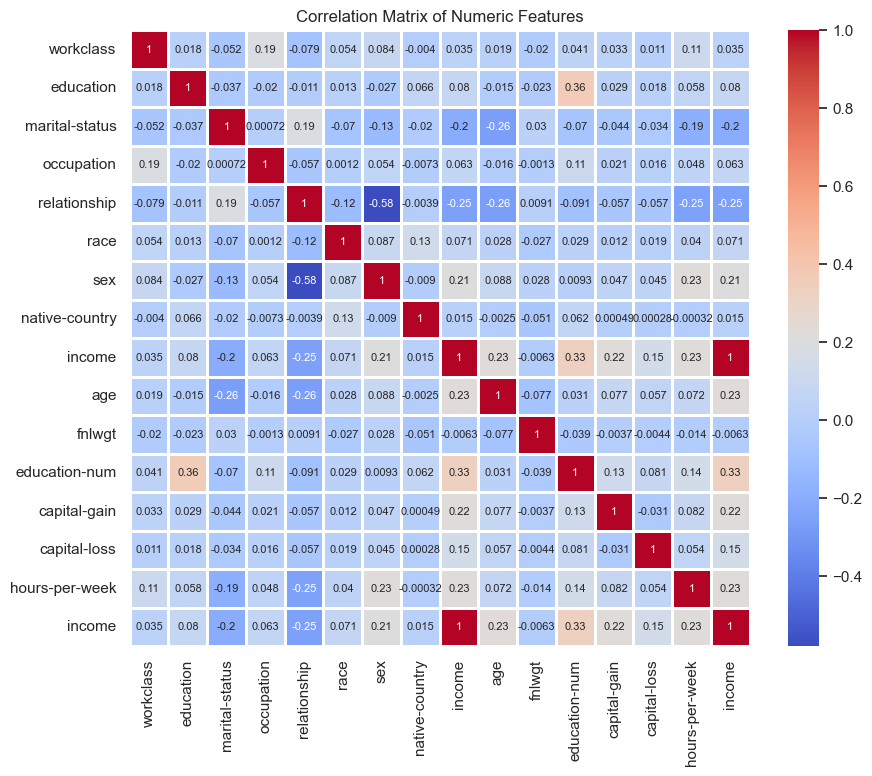

In [48]:

numeric_df = df.select_dtypes(include='number')
concat_df = pd.concat([df_category_encoded, df[numeric_cols]], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(concat_df .corr(), annot=True, cmap='coolwarm',linewidth = 1,annot_kws={"size": 8})

plt.title('Correlation Matrix of Numeric Features')
plt.show()


##### Prparation for modelling 

 drop columns with low correlation 

In [50]:
df.drop(['relationship','fnlwgt'],axis =1 ,inplace =True)

In [51]:
df.head(2)

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,0


#### detect outliers

In [53]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [54]:
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

age: 216 outliers
education-num: 1794 outliers
capital-gain: 4035 outliers
capital-loss: 2282 outliers
hours-per-week: 13496 outliers
income: 11687 outliers


In [55]:
numeric_cols

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

In [56]:
numeric_cols_without_income = [col for col in numeric_cols if col != 'income']
numeric_cols_without_income

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

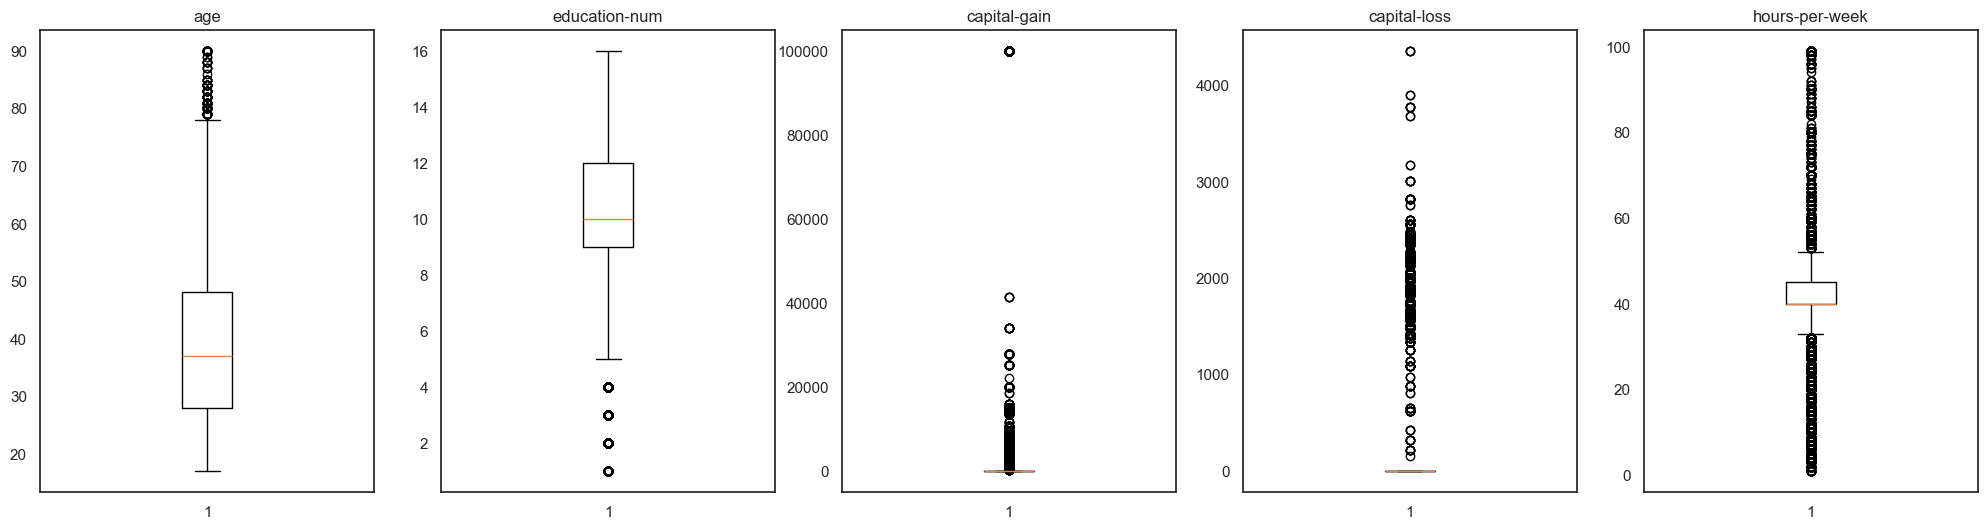

In [57]:

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["education-num"])
ax2.set_title("education-num")

ax3.boxplot(df["capital-gain"])
ax3.set_title("capital-gain")

ax4.boxplot(df["capital-loss"])
ax4.set_title("capital-loss")

ax5.boxplot(df["hours-per-week"])
ax5.set_title("hours-per-week")

plt.show()


In [58]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 

In [59]:
results = []
for col in numeric_cols:
    z_scores = zscore(df[col])
    for threshold in range(1, 4):
        outliers = np.where(z_scores > threshold)[0]
        results.append({
            'Column': col,
            'Threshold': threshold,
            'Number of Outliers': len(outliers)
        })

# create a DataFrame from results
df_results = pd.DataFrame(results)

# pivot so thresholds are rows, columns are numeric columns
outliers_pivot = df_results.pivot(index='Threshold', columns='Column', values='Number of Outliers')

outliers_pivot


Column,age,capital-gain,capital-loss,education-num,hours-per-week,income
Threshold,,,,,,
1,8193,1252,2268,12110,5210,11687
2,1566,383,2239,594,1257,0
3,186,331,2216,0,542,0


#### Age - age_winsorize

In [60]:
z_age = pd.Series(zscore(df['age']), index=df.index)
print((z_age > 2).sum())              # Should show 1566
df[z_age > 2][['age']].head()  # Preview outliers


1566


,age
74,79
77,67
100,76
144,70
157,71


In [61]:
df[z_age > 2]['age'].min()

67

In [62]:
df[df["age"] < 67].age.max()


66

In [63]:
winsorize_percentile_age = (stats.percentileofscore(df["age"], 66)) / 100
print(winsorize_percentile_age)

0.9655214774169771


In [64]:
1- winsorize_percentile_age

0.034478522583022864

In [65]:
age_winsorize = winsorize(df.age, (0, (1 - winsorize_percentile_age)))

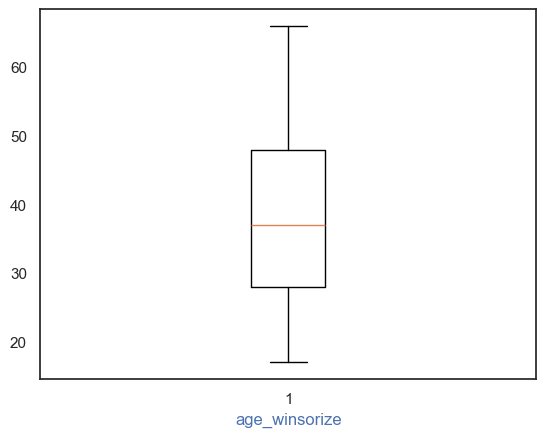

In [66]:
plt.boxplot(age_winsorize)
plt.xlabel("age_winsorize", color = "b")
plt.show()

In [67]:
df["age_winsorize"] = age_winsorize

In [68]:
df.head(1)

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_winsorize
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,0,39


#### capital-gain: capital_gain_winsorize winsorize 

In [69]:
z_capital_gain  = pd.Series(zscore(df['capital-gain']), index=df.index)
print((z_capital_gain  > 2).sum())              # Should show 1566
print(df[z_capital_gain  > 2][['capital-gain']].head())  # Preview outliers

383
      capital-gain
106          34095
534          20051
704          25236
1246         99999
1368         99999


In [70]:
df[z_capital_gain  > 2]['capital-gain'].min()

18481

In [71]:
df[df["capital-gain"] < 18481]['capital-gain'].max()

15831

In [72]:
winsorize_percentile_capital_gain = (stats.percentileofscore(df["capital-gain"], 15831)) / 100
print(winsorize_percentile_capital_gain)

0.992086728635191


In [73]:
capital_gain_winsorize = winsorize(df['capital-gain'], (0, (1 - winsorize_percentile_capital_gain)))

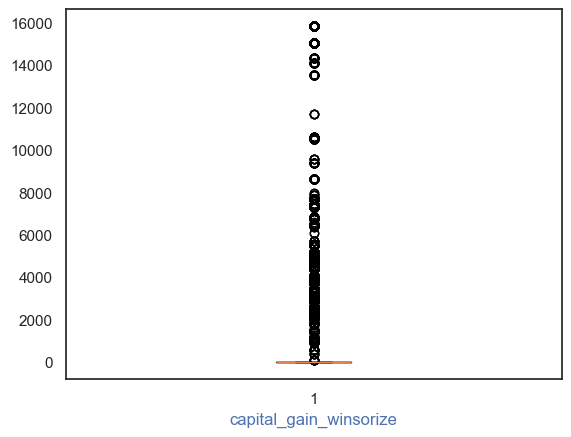

In [74]:
plt.boxplot(capital_gain_winsorize)
plt.xlabel("capital_gain_winsorize", color = "b")
plt.show()

In [75]:
df["capital_gain_winsorize"] = capital_gain_winsorize

In [76]:
df.head(1)

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_winsorize,capital_gain_winsorize
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,0,39,2174


#### capital-loss : capital_loss_winsorize

In [77]:
z_capital_loss  = pd.Series(zscore(df['capital-loss']), index=df.index)
print((z_capital_loss  > 2).sum())              # Should show 1566
print(df[z_capital_loss  > 2][['capital-loss']].head())  # Preview outliers

2239
    capital-loss
23          2042
32          1408
52          1902
93          1573
96          1902


In [78]:
df[z_capital_loss > 2]['capital-loss'].min()

974

In [79]:
df[df["capital-loss"] < 974]['capital-loss'].max()

880

In [80]:
winsorize_percentile_capital_loss = (stats.percentileofscore(df["capital-loss"], 880)) / 100
print(winsorize_percentile_capital_loss)

0.9541071209205191


In [81]:
1- winsorize_percentile_capital_loss

0.04589287907948092

In [82]:
capital_loss_winsorize = winsorize(df['capital-loss'], (0, (1 - winsorize_percentile_capital_loss)))

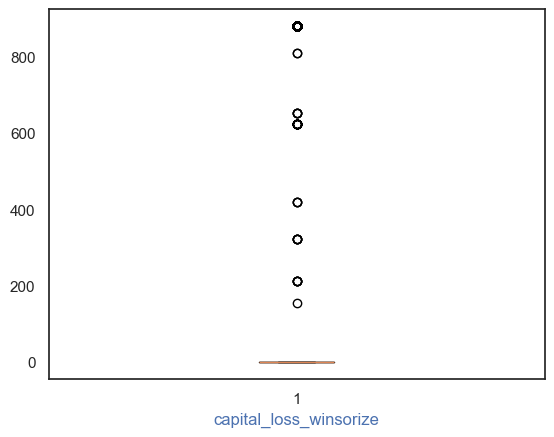

In [83]:
plt.boxplot(capital_loss_winsorize)
plt.xlabel("capital_loss_winsorize", color = "b")
plt.show()

In [84]:
df["capital_loss_winsorize"] = capital_loss_winsorize

In [85]:
df.head(1)

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_winsorize,capital_gain_winsorize,capital_loss_winsorize
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,0,39,2174,0


#### hours-per-week :hours_per_week_winsorize 

In [86]:
z_hours_per_week =pd.Series(zscore(df['hours-per-week']), index=df.index)
print((z_hours_per_week  > 2).sum())              # Should show 1566
print(df[z_hours_per_week  > 2][['hours-per-week']].head())  # Preview outliers

1257
     hours-per-week
10               80
28               80
72               70
238              70
265              75


In [87]:
df[z_hours_per_week > 2]['hours-per-week'].min()

66

In [91]:
df[df["hours-per-week"] < 66]['hours-per-week'].max()

65

In [92]:
winsorize_percentile_hours_per_week = (stats.percentileofscore(df["hours-per-week"], 65)) / 100
print(winsorize_percentile_hours_per_week)

0.9706400229310839


In [93]:
1- winsorize_percentile_hours_per_week

0.029359977068916132

In [94]:
hours_per_week_winsorize = winsorize(df['hours-per-week'], (0, (1 - winsorize_percentile_hours_per_week)))

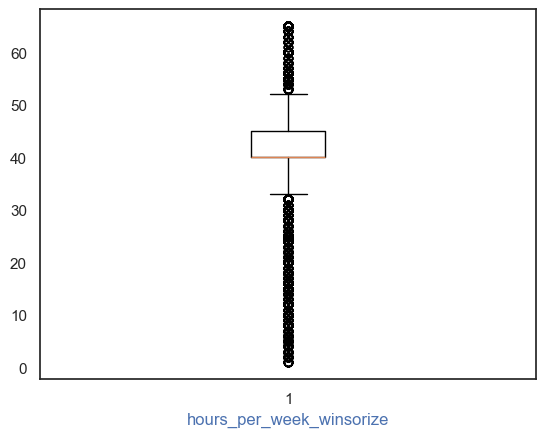

In [95]:
plt.boxplot(hours_per_week_winsorize)
plt.xlabel("hours_per_week_winsorize", color = "b")
plt.show()

In [96]:
df["hours_per_week_winsorize"] = hours_per_week_winsorize
df.head(1)

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_winsorize,capital_gain_winsorize,capital_loss_winsorize,hours_per_week_winsorize
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,0,39,2174,0,40


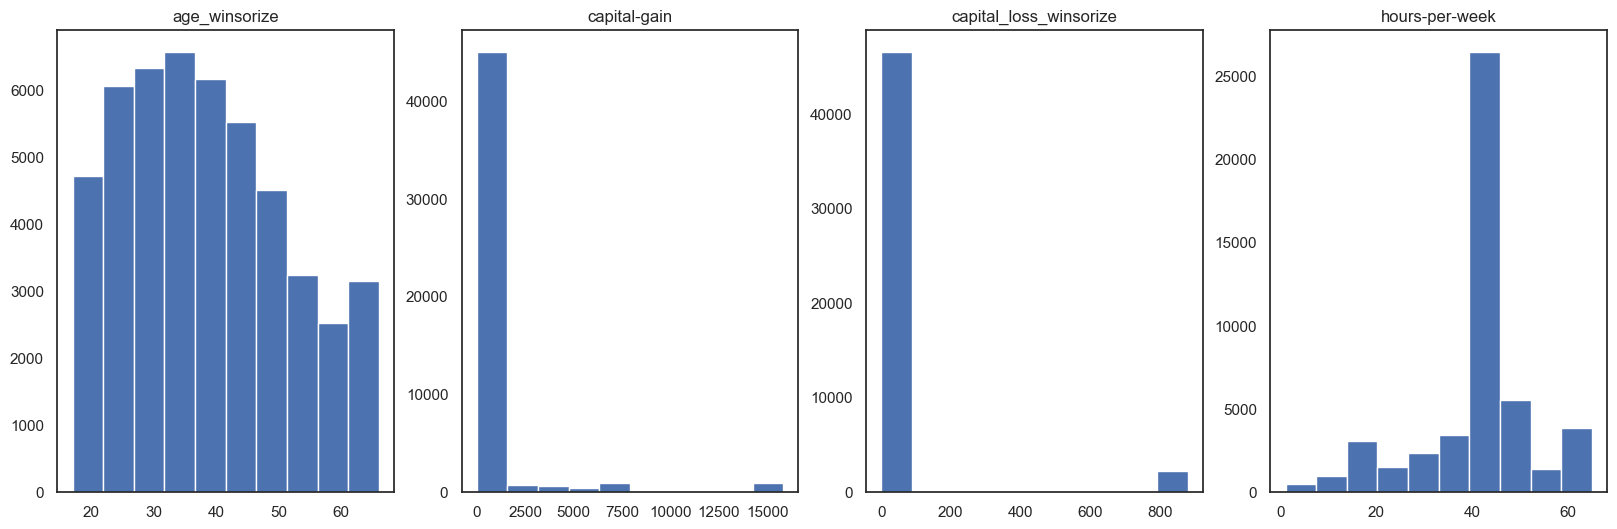

In [98]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))


ax1.hist(df["age_winsorize"])
ax1.set_title("age_winsorize")

ax2.hist(df["capital_gain_winsorize"])
ax2.set_title("capital-gain")

ax3.hist(df["capital_loss_winsorize"])
ax3.set_title("capital_loss_winsorize")

ax4.hist(df["hours_per_week_winsorize"])
ax4.set_title("hours-per-week") 

plt.show()

In [99]:
df.skew(numeric_only=True).to_frame(name='skewness')

,skewness
age,0.557580
education-num,-0.316525
capital-gain,11.894659
capital-loss,4.569809
hours-per-week,0.238750
income,1.222216
age_winsorize,0.364626
capital_gain_winsorize,4.654093
capital_loss_winsorize,4.311475
hours_per_week_winsorize,-0.480057


#### Minimize skew :Capital_gain_log

In [103]:
df["capital_gain_log"] = np.log(df["capital_gain_winsorize"])
df["capital_gain_sqrt"] = np.sqrt(df["capital_gain_winsorize"])

In [104]:
df.head(1)

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_winsorize,capital_gain_winsorize,capital_loss_winsorize,hours_per_week_winsorize,capital_gain_log,capital_gain_sqrt
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,0,39,2174,0,40,7.684324,46.626173


In [105]:
df[["capital_gain_winsorize", "capital_gain_log", "capital_gain_sqrt"]].agg(["skew"]).transpose()

,skew
capital_gain_winsorize,4.654093
capital_gain_log,-0.750892
capital_gain_sqrt,3.633563


In [106]:
df.drop(["capital_gain_winsorize", "capital_gain_sqrt","capital-gain"],axis=1,inplace=True,errors='ignore')

In [107]:
df.head(1)

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-loss,hours-per-week,native-country,income,age_winsorize,capital_loss_winsorize,hours_per_week_winsorize,capital_gain_log
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,0,40,United-States,0,39,0,40,7.684324


In [108]:
#### Minimize skew :Capital_loss_log

In [109]:
df["capital_loss_winsorize_log"] = np.log1p(df["capital_loss_winsorize"])

df["capital_loss_winsorize_sqrt"] = np.sqrt(df["capital_loss_winsorize"])

In [110]:
df[["capital_loss_winsorize", "capital_loss_winsorize_log", "capital_loss_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
capital_loss_winsorize,4.311475
capital_loss_winsorize_log,4.297102
capital_loss_winsorize_sqrt,4.303270


In [111]:
df['capital_loss_bin'] = pd.qcut(df['capital_loss_winsorize_log'], q=4, labels=False, duplicates='drop')

In [112]:
df[["capital_loss_bin","capital_loss_winsorize", "capital_loss_winsorize_log", "capital_loss_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
capital_loss_bin,0.000000
capital_loss_winsorize,4.311475
capital_loss_winsorize_log,4.297102
capital_loss_winsorize_sqrt,4.303270


In [113]:
df.drop(["capital_loss_bin", "capital_loss_winsorize","capital-loss","capital_loss_winsorize_sqrt"],axis=1,inplace=True,errors='ignore')

In [114]:
df

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income,age_winsorize,hours_per_week_winsorize,capital_gain_log,capital_loss_winsorize_log
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,0,39,40,7.684324,0.0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,0,50,13,NaN,0.0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,0,38,40,NaN,0.0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,0,53,40,NaN,0.0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,0,28,40,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,White,Female,36,United-States,0,39,36,NaN,0.0
48838,64,Private,HS-grad,9,Widowed,Missing,Black,Male,40,United-States,0,64,40,NaN,0.0
48839,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,White,Male,50,United-States,0,38,50,NaN,0.0
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,40,United-States,0,44,40,8.604288,0.0


#### Visualization after  Skewed

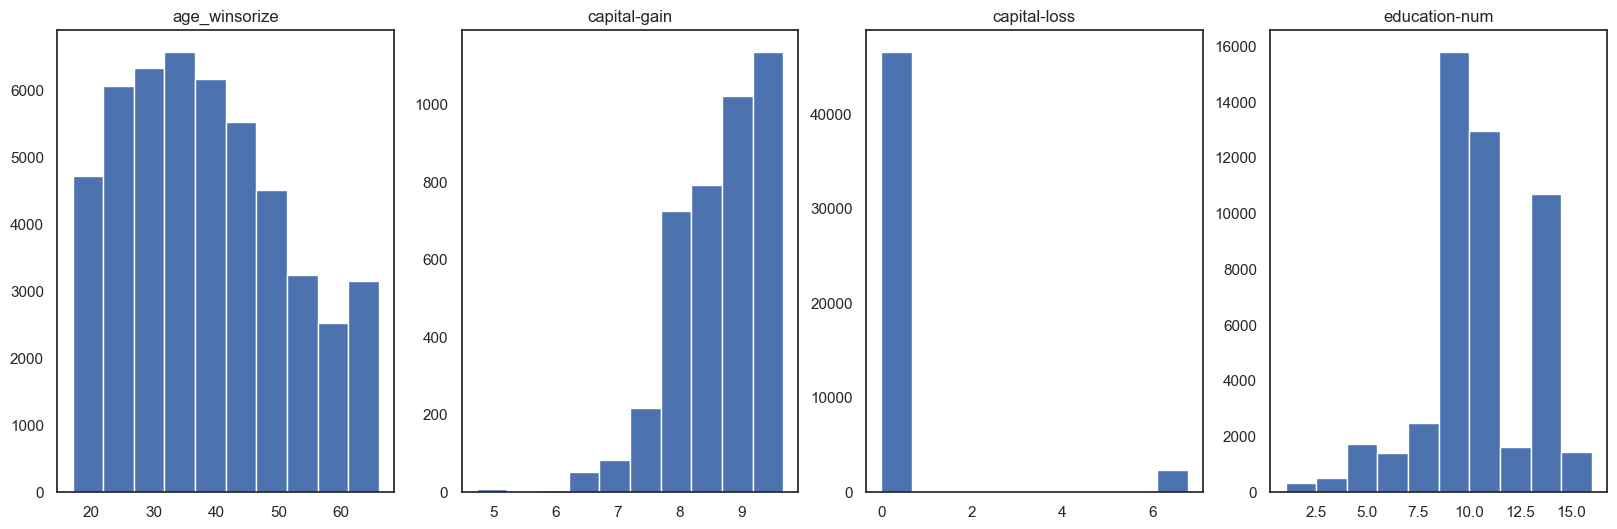

In [115]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))


ax1.hist(df["age_winsorize"])
ax1.set_title("age_winsorize")

ax2.hist(df["capital_gain_log"])
ax2.set_title("capital-gain")

ax3.hist(df["capital_loss_winsorize_log"])
ax3.set_title("capital-loss") 

ax4.hist(df["education-num"])
ax4.set_title("education-num")

plt.show()

In [116]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'race', 'sex', 'hours-per-week', 'native-country',
       'income', 'age_winsorize', 'hours_per_week_winsorize',
       'capital_gain_log', 'capital_loss_winsorize_log'],
      dtype='object')

In [160]:
# df.drop(columns=[
#     'age', 'hours-per-week',
#     'fnlwgt','relationship' , # optional
# ], inplace=True)


In [118]:
df.drop(columns=[
    'age', 'capital-gain', 'capital-loss', 'hours-per-week',
    'fnlwgt', 'education-num', 'relationship'  # optional
], inplace=True,errors ='ignore')

In [119]:
numeric_cols = [
    'age_winsorize', 
    'capital_gain_log', 
    'capital_loss_winsorize_log', 
    'hours_per_week_winsorize'
]


#### RobustScaler

In [120]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [121]:
df

,workclass,education,marital-status,occupation,race,sex,native-country,income,age_winsorize,hours_per_week_winsorize,capital_gain_log,capital_loss_winsorize_log
0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,United-States,0,0.10,0.0,-0.877953,0.0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,United-States,0,0.65,-5.4,NaN,0.0
2,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,United-States,0,0.05,0.0,NaN,0.0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States,0,0.80,0.0,NaN,0.0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,Cuba,0,-0.45,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,White,Female,United-States,0,0.10,-0.8,NaN,0.0
48838,Private,HS-grad,Widowed,Missing,Black,Male,United-States,0,1.35,0.0,NaN,0.0
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,White,Male,United-States,0,0.05,2.0,NaN,0.0
48840,Private,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male,United-States,0,0.35,0.0,-0.211013,0.0


In [123]:
import pandas as pd

def group_occupation(occ):
    if pd.isna(occ):
        return 'Missing'
    if occ in ['Exec-managerial', 'Prof-specialty']:
        return 'White-Collar'
    elif occ in ['Craft-repair', 'Machine-op-inspct', 'Transport-moving']:
        return 'Blue-Collar'
    elif occ in ['Protective-serv', 'Priv-house-serv', 'Other-service']:
        return 'Service'
    elif occ in ['Farming-fishing', 'Handlers-cleaners']:
        return 'Manual'
    else:
        return 'Other'

def group_marital(status):
    if pd.isna(status):
        return 'Missing'
    if isinstance(status, str) and 'Married' in status:
        return 'Married'
    elif status in ['Divorced', 'Separated', 'Widowed']:
        return 'Not-Married'
    else:
        return 'Single'

def group_education(edu):
    if pd.isna(edu):
        return 'Missing'
    if edu in ['Bachelors', 'Masters', 'Doctorate']:
        return 'Higher'
    elif edu in ['HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc']:
        return 'Lower'
    else:
        return 'Other'

def group_workclass(wc):
    if pd.isna(wc):
        return 'Missing'
    if wc == 'Private':
        return 'Private'
    elif wc in ['Self-emp-not-inc', 'Self-emp-inc']:
        return 'Self-Employed'
    elif wc in ['Federal-gov', 'Local-gov', 'State-gov']:
        return 'Public'
    else:
        return 'Other'

def group_native_country(country):
    if pd.isna(country):
        return 'Missing'
    if country == 'United-States':
        return 'US'
    else:
        return 'Other'

# Apply the grouping functions safely
df['occupation'] = df['occupation'].apply(group_occupation)
df['marital-status'] = df['marital-status'].apply(group_marital)
df['education'] = df['education'].apply(group_education)
df['native-country'] = df['native-country'].apply(group_native_country)
df['workclass'] = df['workclass'].apply(group_workclass)


#### Encoding

In [124]:
categorical_cols = [
    'workclass', 'education', 'marital-status', 'occupation',
    'race', 'sex', 'native-country', 'income', 'relationship'  # <- relationship NOT in df
]

In [125]:
categorical_cols = [col for col in categorical_cols if col in df.columns]

In [126]:
df_encoded = pd.get_dummies(df.drop('income', axis=1), drop_first=True)
df_encoded['income'] = df['income']


In [128]:
df_encoded.head()

,age_winsorize,hours_per_week_winsorize,capital_gain_log,capital_loss_winsorize_log,workclass_Other,workclass_Private,workclass_Public,workclass_Self-Employed,education_Lower,education_Other,...,occupation_Service,occupation_White-Collar,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Other,native-country_US,income
0,0.10,0.0,-0.877953,0.0,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,True,0
1,0.65,-5.4,NaN,0.0,False,False,False,True,False,False,...,False,True,False,False,False,True,True,False,True,0
2,0.05,0.0,NaN,0.0,False,True,False,False,True,False,...,False,False,False,False,False,True,True,False,True,0
3,0.80,0.0,NaN,0.0,False,True,False,False,False,True,...,False,False,False,True,False,False,True,False,True,0
4,-0.45,0.0,NaN,0.0,False,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,0


#### Separating Data into Test and Training Set

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [132]:
X_train.head()

,age_winsorize,hours_per_week_winsorize,capital_gain_log,capital_loss_winsorize_log,workclass_Other,workclass_Private,workclass_Public,workclass_Self-Employed,education_Lower,education_Other,...,occupation_Other,occupation_Service,occupation_White-Collar,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Other,native-country_US
34495,0.00,-2.0,NaN,0.000000,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
18591,0.95,0.0,NaN,6.781058,False,False,False,True,False,True,...,False,False,True,False,False,False,True,True,False,True
12562,0.80,-1.0,NaN,0.000000,False,True,False,False,True,False,...,False,False,False,False,False,False,True,True,False,True
552,1.45,0.0,NaN,0.000000,False,True,False,False,False,True,...,True,False,False,False,False,False,True,False,False,True
3479,0.45,-0.4,NaN,0.000000,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True


In [133]:
y_train.head()

34495    0
18591    0
12562    0
552      0
3479     0
Name: income, dtype: int64

In [134]:
y_train.value_counts(normalize=True)


income
0    0.76073
1    0.23927
Name: proportion, dtype: float64

In [135]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 39073
X_test: 9769
y_train: 39073
y_test: 9769


#### LogisticRegression

In [137]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Create an imputer and logistic regression pipeline
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # or 'median', 'most_frequent', etc.
    LogisticRegression()
)

pipeline.fit(X_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

In [138]:
y_pred = pipeline.predict(X_test)

In [139]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.8447


#### Cross Validation 

https://genome.tugraz.at/proclassify/help/pages/images/xv_folds.gif

In [141]:
scores = cross_val_score(pipeline, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8423579416749165


#### ROC CURVE

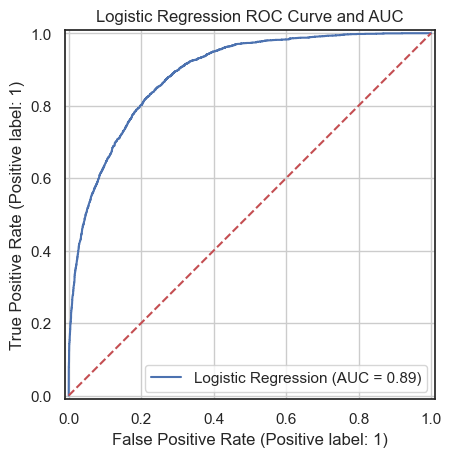

In [144]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(pipeline, X_test, y_test, name="Logistic Regression")
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference
plt.title("Logistic Regression ROC Curve and AUC")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# define pipeline again
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    LogisticRegression(max_iter=500)
)

In [ ]:
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],  # 'l1' needs solver='liblinear' or 'saga'
    'logisticregression__solver': ['lbfgs', 'liblinear']}

In [ ]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best AUC Score:", grid.best_score_)

#### DecisionTreeClassifier

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [148]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [149]:
y_pred = dec_tree.predict(X_test)

In [150]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.8221926502200839


In [152]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.812877430910952


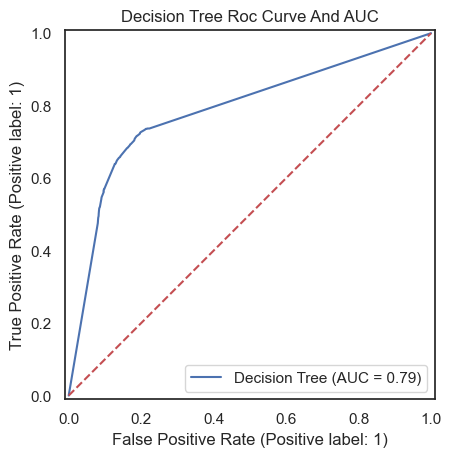

In [154]:
RocCurveDisplay.from_estimator(dec_tree, X_test, y_test, name = "Decision Tree")
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#### Support Vector Machine Algorithm 

In [156]:
from sklearn.svm import SVC

In [157]:
svc_model = SVC(random_state = 5)

In [159]:
svc_model = make_pipeline(
    SimpleImputer(strategy='mean'),
    SVC()
)

In [160]:
svc_model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('svc', SVC())])

In [161]:
y_pred = svc_model.predict(X_test)

In [162]:
print("The test accupipelineracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accupipelineracy score of SVM is: 0.8429726686457161


In [163]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8397982490729399


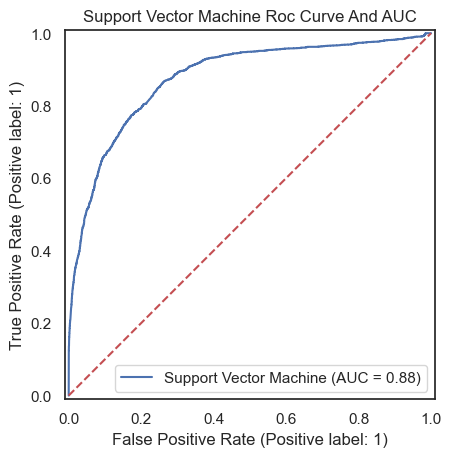

In [164]:
RocCurveDisplay.from_estimator(svc_model, X_test, y_test, name = "Support Vector Machine")
plt.title("Support Vector Machine Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [ ]:
#### Random Forest Algorithm 

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
random_forest = make_pipeline(
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(random_state = 5)
)

In [167]:
random_forest.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=5))])

In [168]:
y_pred = random_forest.predict(X_test)

In [169]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.8369331559013206


In [170]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8300736614259108


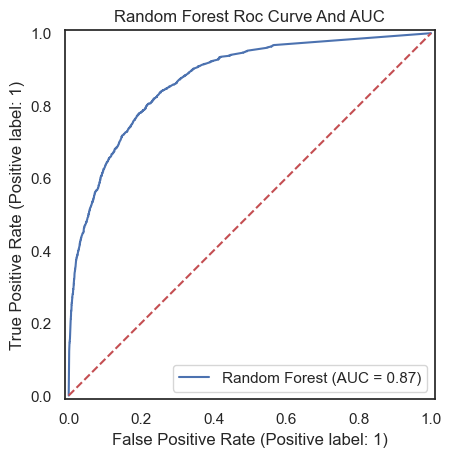

In [172]:
RocCurveDisplay.from_estimator(random_forest, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#### Hyperparameter Optimization(**with GridSearchCV**)

In [173]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [174]:
parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False]}

In [175]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)

In [ ]:
random_forest_grid.fit(X_train, y_train)

In [ ]:
print("Best Parameters:", random_forest_grid.best_params_)

In [ ]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "auto", n_estimators = 200, random_state = 5)

In [ ]:
random_forest_new2.fit(X_train, y_train)

In [ ]:
y_pred = random_forest_new2.predict(X_test)

In [ ]:
print("The test accuracy score of Random Forest after hyper-parameter tuning is:", accuracy_score(y_test, y_pred))

In [ ]:
plot_roc_curve(random_forest_new2, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

### 7. Project Conclusion <a id = 62></a>

**The activities we carried out within the scope of the project are as follows:**
1. Within the scope of the project, we first made the data set ready for **Exploratory Data Analysis(EDA)**
2. We performed **Exploratory Data Analysis(EDA)**. 
3. We analyzed numerical and categorical variables within the scope of univariate analysis by using **Distplot** and **Pie Chart** graphics.
4. Within the scope of bivariate analysis, we analyzed the variables among each other using **FacetGrid, Count Plot, Box plot, and Heatmap** graphics.
5. We made the data set ready for the model. In this context, we struggled with **missing** and **outlier** values. 
6. We used **four different algorithms** in the model phase.
7. We got **84% accuracy** and **89% AUC** with the **Logistic Regression model**.
8. We got **82% accuracy** and **79% AUC** with the **Decision Tree Model**.
9. We got **84% accuracy** and **88% AUC** with the **Support Vector Classifier Model**.
10. And we got **83% accuracy** and **87% AUC** with the **Random Forest Classifier Model**.
11. When all these model outputs are evaluated, we **prefer** the model we created with the **Logistic Regression model**, which gives the **best results**.



We used hyperparameter tuning for Random Forest and Logistic Regression. For SVM, we initially used default parameters, but I now understand that tuning C, kernel, and gamma is important to control margin, boundary shape, and generalization. This is an area I plan to explore further for better model optimization.”